In [8]:
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
import sys
pose_egg = '/usr/local/lib/python3.6/site-packages/pose-1.0.0-py3.6.egg'
sys.path.append(pose_egg)


from scipy.misc import imread

from pose.config import load_config
from pose.nnet import predict
from pose.util import visualize
from pose.dataset.pose_dataset import data_to_input

import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
cfg = load_config("/Users/gregoirelejay/dev/personal/tag_walk/ext_models/pose-tensorflow/pose/demo/pose_cfg.yaml")

# Load and setup CNN part detector
sess, inputs, outputs = predict.setup_pose_prediction(cfg)

# Read image from file
file_name = "/Volumes/bobby//tag_walk/tag_walk//data/outputs//paperdoll_images/42356.jpg"
image = imread(file_name, mode='RGB')

image_batch = data_to_input(image)

# Compute prediction with the CNN
outputs_np = sess.run(outputs, feed_dict={inputs: image_batch})
scmap, locref, _ = predict.extract_cnn_output(outputs_np, cfg)

# Extract maximum scoring location from the heatmap, assume 1 person
pose = predict.argmax_pose_predict(scmap, locref, cfg.stride)

# Visualise
visualize.show_heatmaps(cfg, image, scmap, pose)
plt.show()

('weight file name', '/Users/gregoirelejay/dev/personal/tag_walk/ext_models/pose-tensorflow/models/mpii/mpii-single-resnet-101')
INFO:tensorflow:Restoring parameters from /Users/gregoirelejay/dev/personal/tag_walk/ext_models/pose-tensorflow/models/mpii/mpii-single-resnet-101


INFO:tensorflow:Restoring parameters from /Users/gregoirelejay/dev/personal/tag_walk/ext_models/pose-tensorflow/models/mpii/mpii-single-resnet-101


In [6]:
locref

array([[[[ -5.21836698e-01,  -2.84814692e+00],
         [ -8.13863337e-01,  -4.91422129e+00],
         [ -8.51613140e+00,  -7.37263823e+00],
         ..., 
         [ -7.41222239e+00,  -2.05695701e+00],
         [ -4.10130453e+00,  -5.75698709e+00],
         [ -7.66271591e+00,  -2.29284167e+00]],

        [[  1.15045369e+00,   2.32779169e+00],
         [  1.88502002e+00,  -1.28354206e+01],
         [ -4.01449728e+00,  -6.54226208e+00],
         ..., 
         [ -9.94465053e-02,  -2.64215183e+00],
         [ -7.01631069e-01,  -6.98719406e+00],
         [ -5.20744133e+00,  -3.45730275e-01]],

        [[ -2.57876968e+00,  -2.91110373e+00],
         [  1.03049636e+00,  -1.07230730e+01],
         [ -2.70267367e+00,  -7.73328352e+00],
         ..., 
         [ -1.29935622e-01,  -1.83914626e+00],
         [ -1.11669831e-01,  -5.65899229e+00],
         [ -6.76725149e-01,   2.25177314e-03]],

        ..., 
        [[  2.49523139e+00,   6.09203696e-01],
         [  6.44217587e+00,  -1.22952805e+

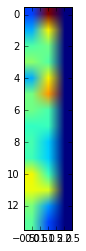

In [9]:
plt.imshow(pose)

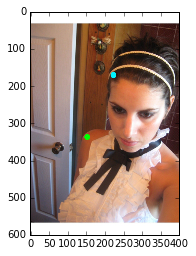

In [11]:
plt.imshow(visualize.visualize_joints(image, pose))


In [12]:
pose.shape


(14, 3)